In [4]:
import seaborn as sb
import matplotlib.pyplot as mp
import pandas as pd
import numpy as np


#removed Duplicates using .duplicated()-> using customerID / df.info() to see the data information /.isnull() -> for null values isnull().sum() gives the count of null

In [7]:
telco_dataset=pd.read_csv('telco_customer_churn.csv')
telco_dataset['customerID'].duplicated()
#telco_dataset.isnull().sum
#telco_dataset.info()
telco_dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


#replaced the blank values to '0' using replace('','0') and conferting datatype to float using .astype() 

In [10]:
telco_dataset['TotalCharges']=telco_dataset['TotalCharges'].replace(' ','0')
telco_dataset['TotalCharges']=telco_dataset['TotalCharges'].astype('float')

#coverting the values in senior citizen / map(funName) or apply(funName) -> used to assign the function 

In [16]:
def convert(value):
    if value==1:
        return 'Yes'
    else:
        return 'No'

telco_dataset['SeniorCitizen']=telco_dataset['SeniorCitizen'].map(convert)
#print(telco_dataset['SeniorCitizen'].tail(60)) / to check 

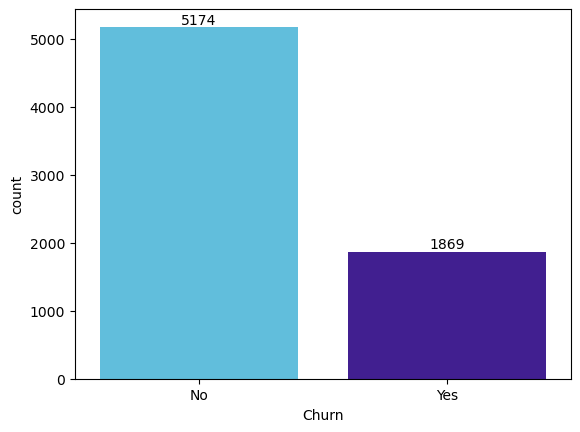

In [18]:
count_of_seniourCitizen=sb.countplot(telco_dataset,x='Churn',hue='Churn',palette=['#4CC9F0','#3A0CA3']) # ,hue='SeniorCitizen' if saperated with hue the bar_labels show count of only the selected value eg containers[0]

#sb.set_palette('bright')
count_of_seniourCitizen.bar_label(count_of_seniourCitizen.containers[0])
count_of_seniourCitizen.bar_label(count_of_seniourCitizen.containers[1])
mp.show()

       Churn
Churn       
No      5174
Yes     1869


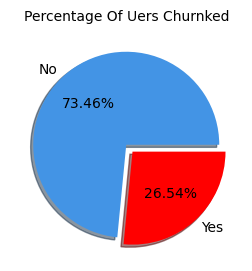

In [21]:
mp.figure(figsize=(3,5))
churn_group=telco_dataset.groupby('Churn').agg({'Churn':'count'})
print(churn_group)
mp.pie(churn_group['Churn'],labels=churn_group.index,autopct='%.2f%%',colors=['#4394E5','red'],explode=[0,0.1],shadow=4)
mp.title('Percentage Of Uers Churnked',fontsize=10,)
mp.show()

In [23]:
total_users=telco_dataset['customerID'].count()
print(total_users)

7043


In [25]:
telco_dataset.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

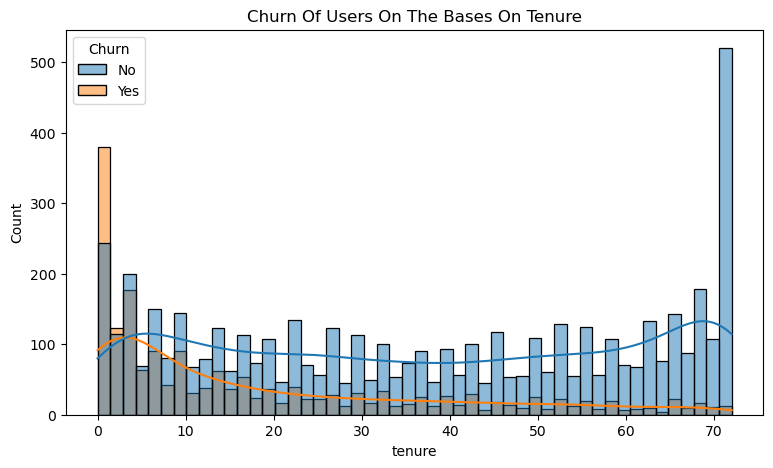

In [54]:
mp.figure(figsize=(9,5))
sb.histplot(telco_dataset,x='tenure',hue='Churn',bins=50,kde=True)
mp.title('Churn Of Users On The Bases On Tenure')
mp.show()

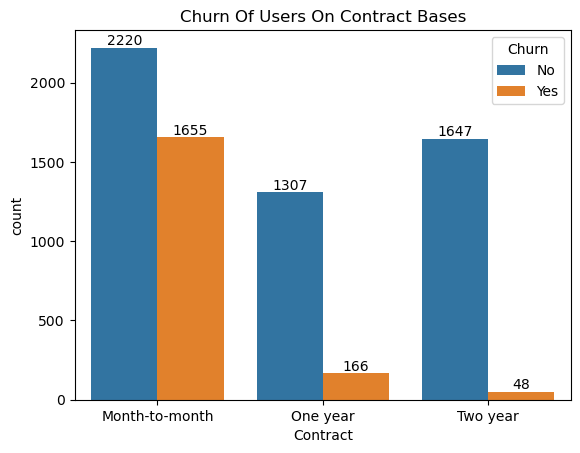

In [30]:
contract_bases=sb.countplot(telco_dataset,x='Contract',hue='Churn')
contract_bases.bar_label(contract_bases.containers[0])
contract_bases.bar_label(contract_bases.containers[1])
mp.title('Churn Of Users On Contract Bases')
mp.show()

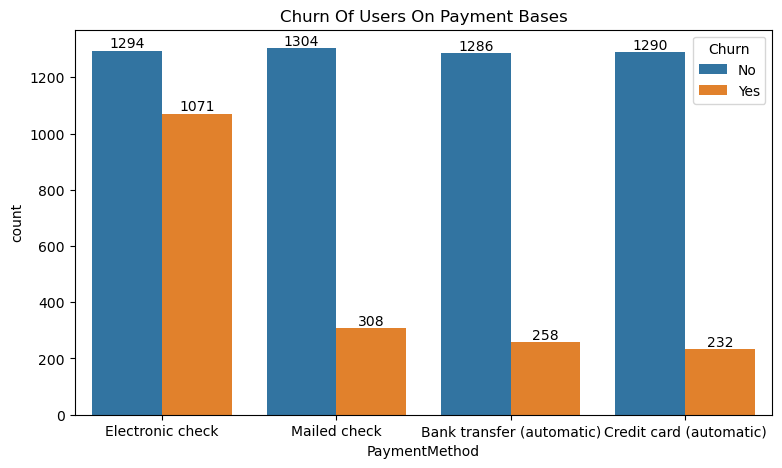

In [33]:
mp.figure(figsize=(9,5))
payment_bases=sb.countplot(telco_dataset,x='PaymentMethod',hue='Churn')
payment_bases.bar_label(payment_bases.containers[0])
payment_bases.bar_label(payment_bases.containers[1])
mp.title('Churn Of Users On Payment Bases')
mp.show()

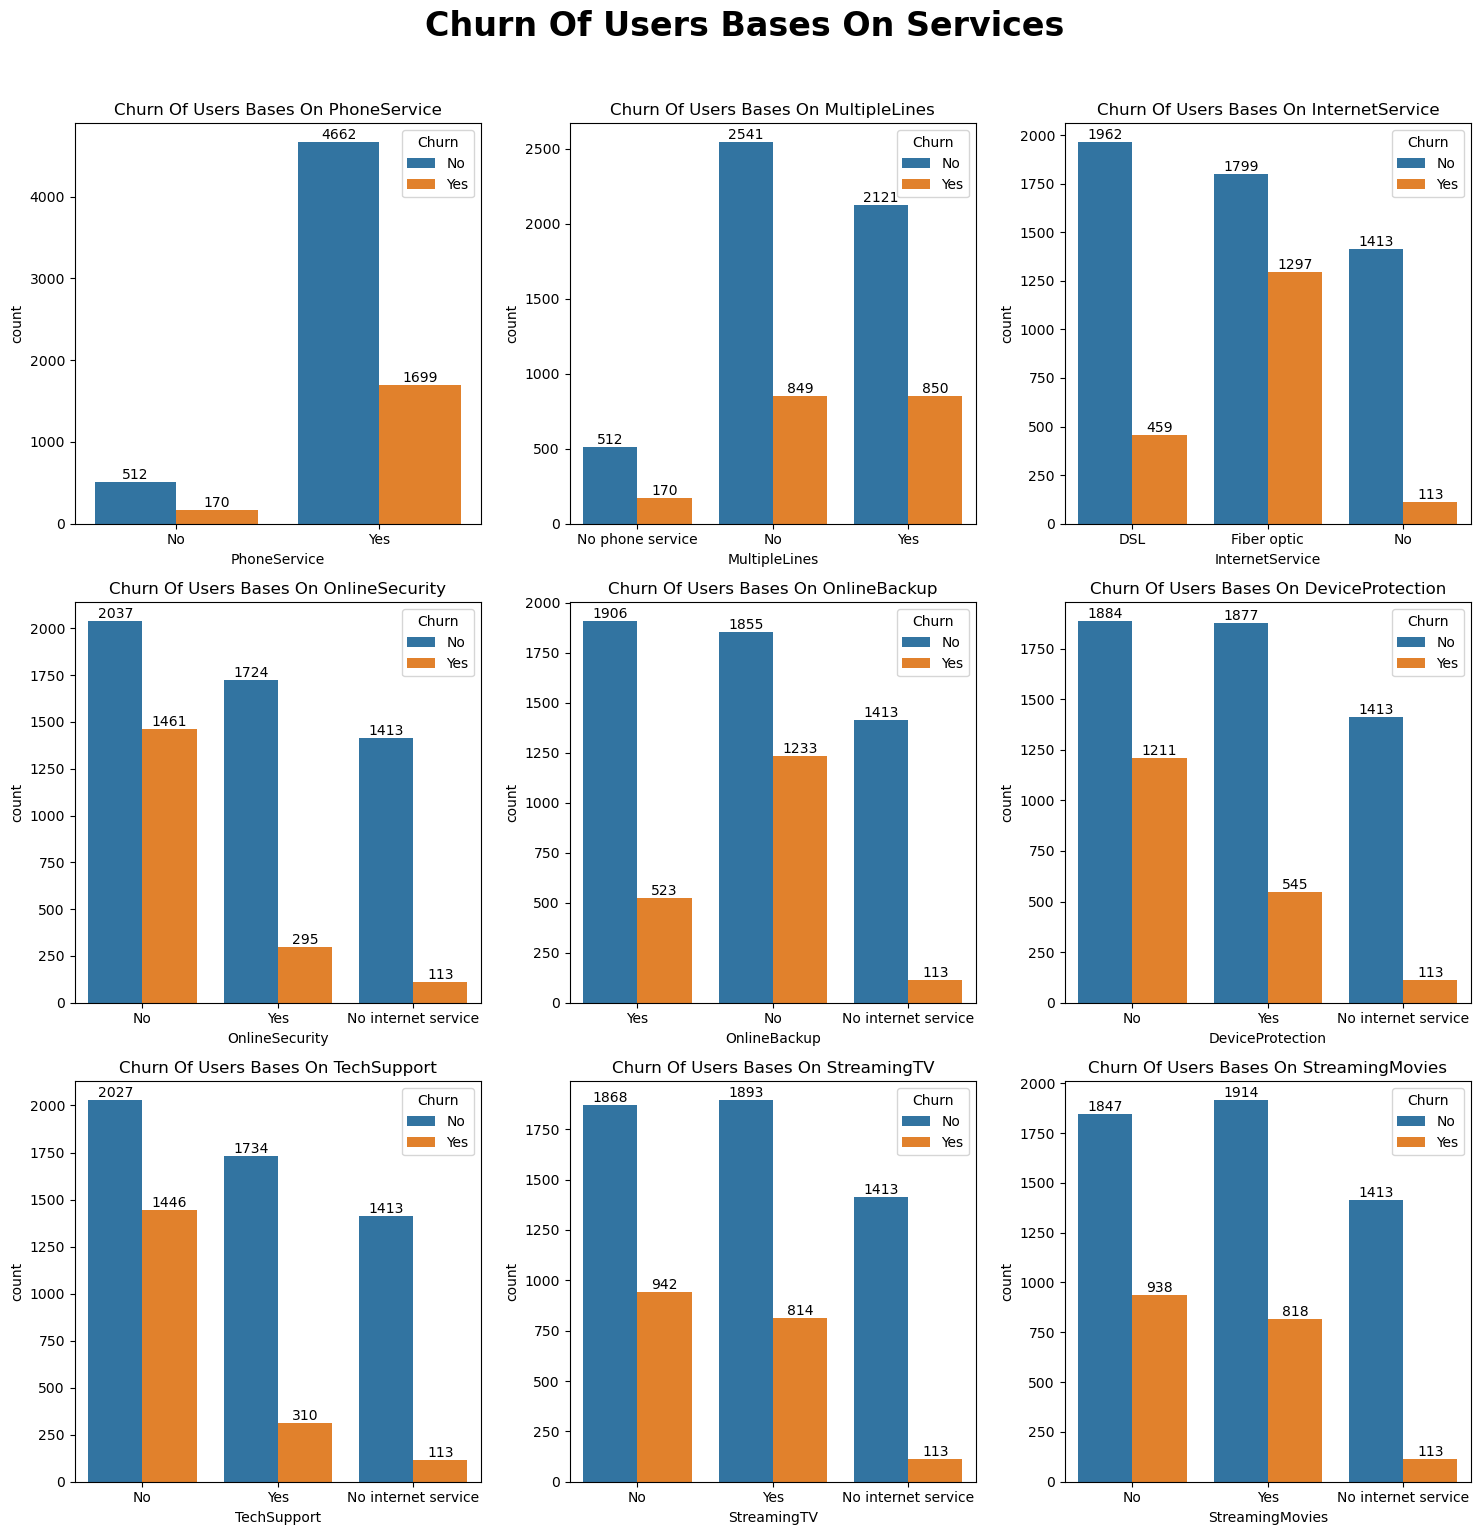

StreamingMovies


In [36]:
import seaborn as sb
import matplotlib.pyplot as mp
import pandas as pd
import numpy as np

service_list=['PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies']

def service_churn(list,ds):
    mp.figure(figsize=(15,15))
    num=0
    for i in list:
        mp.subplot(3,3,num+1)
        val=sb.countplot(data=ds,x=i,hue='Churn')
        val.bar_label(val.containers[0])
        val.bar_label(val.containers[1])
        mp.title(f"Churn Of Users Bases On {i}")
        num+=1
        mp.suptitle("Churn Of Users Bases On Services",fontsize=24, fontweight='bold',y=1.02)
    mp.tight_layout()  # Adjusts the layout to prevent overlap
    mp.show()
    print(i)
        
        
service_churn(service_list,telco_dataset)




    

In [52]:
#Method-2

# import seaborn as sb
# import matplotlib.pyplot as mp
# import pandas as pd
# import numpy as np

# service_list=['PhoneService', 'MultipleLines', 'InternetService',
#        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
#        'TechSupport', 'StreamingTV', 'StreamingMovies']

# def service_churn(list,ds):
#     mp.figure(figsize=(15,24))
#     num=0
#     for i in list:
#         mp.subplot(5,2,num+1)
#         val=sb.countplot(data=ds,x=i,hue='Churn')
#         val.bar_label(val.containers[0])
#         val.bar_label(val.containers[1])
#         mp.title(f"Churn Of Users Bases On {i}")
#         num+=1
#         mp.suptitle("Churn Of Users Bases On Services",fontsize=24, fontweight='bold',y=1.02)
#     mp.tight_layout()  # Adjusts the layout to prevent overlap
#     mp.show()
    
        
        
# service_churn(service_list,telco_dataset)